# IMPORTING LIBRARIES

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
%pip install plotly
import plotly.express as px

Note: you may need to restart the kernel to use updated packages.


In [26]:
from IPython.display import Image
Image(url="https://imgs.search.brave.com/bD7IrEwWMWqhplslAUU2AHlFw5sk5IF-cuJ1A5i4hBs/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9jZG4u/Y29ycG9yYXRlZmlu/YW5jZWluc3RpdHV0/ZS5jb20vYXNzZXRz/L3VuZW1wbG95bWVu/dC5qcGVn")

In [27]:
ua = pd.read_csv("file:///C:/Users/kante/OneDrive/Desktop/python/dataset3/Unemployment_Rate_upto_11_2020.csv")

# EXPLORING THE DATA

In [28]:
ua.shape


(267, 9)

In [29]:
ua.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [30]:
ua.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [31]:
pd.isnull(ua).sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [32]:
#drop null values

ua.dropna(inplace=True)


In [33]:
ua.shape


(267, 9)

In [34]:
ua.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


# DATA PREPROCESSING


In [35]:
ua.columns = ua.columns.str.strip()  # Remove leading and trailing whitespaces from column names

ua.rename(columns={
    'Region': 'State',
    'Date': 'Date',
    'Frequency': 'Frequency',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labor_Participation_Rate',
    'Region.1': 'Region',
    'Longitude': 'Latitude',
    'Latitude': 'Longitude'
}, inplace=True)

print(ua.columns)

Index(['State', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labor_Participation_Rate', 'Region', 'longitude', 'latitude'],
      dtype='object')


In [36]:
ua.head()


,State,Date,Frequency,Unemployment_Rate,Employed,Labor_Participation_Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [37]:
ua.State.value_counts()


Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: State, dtype: int64

In [38]:
ua['Date'] = pd.to_datetime(ua['Date'],dayfirst=True)  # Converting 'Date' column to datetime

# Creating a new column for the month
ua['Month'] = ua['Date'].dt.month

print(ua.head())

            State       Date Frequency  Unemployment_Rate  Employed  \
0  Andhra Pradesh 2020-01-31         M               5.48  16635535   
1  Andhra Pradesh 2020-02-29         M               5.83  16545652   
2  Andhra Pradesh 2020-03-31         M               5.79  15881197   
3  Andhra Pradesh 2020-04-30         M              20.51  11336911   
4  Andhra Pradesh 2020-05-31         M              17.43  12988845   

   Labor_Participation_Rate Region  longitude  latitude  Month  
0                     41.02  South    15.9129     79.74      1  
1                     40.90  South    15.9129     79.74      2  
2                     39.18  South    15.9129     79.74      3  
3                     33.10  South    15.9129     79.74      4  
4                     36.46  South    15.9129     79.74      5  


# DATA VISUALIZATION


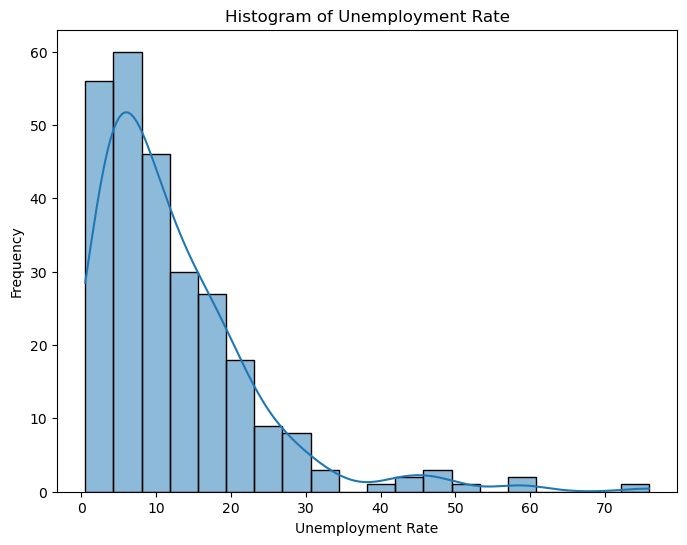

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(ua['Unemployment_Rate'], bins=20, kde=True)
plt.title('Histogram of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

#  Unemployment Rate over time (Date)

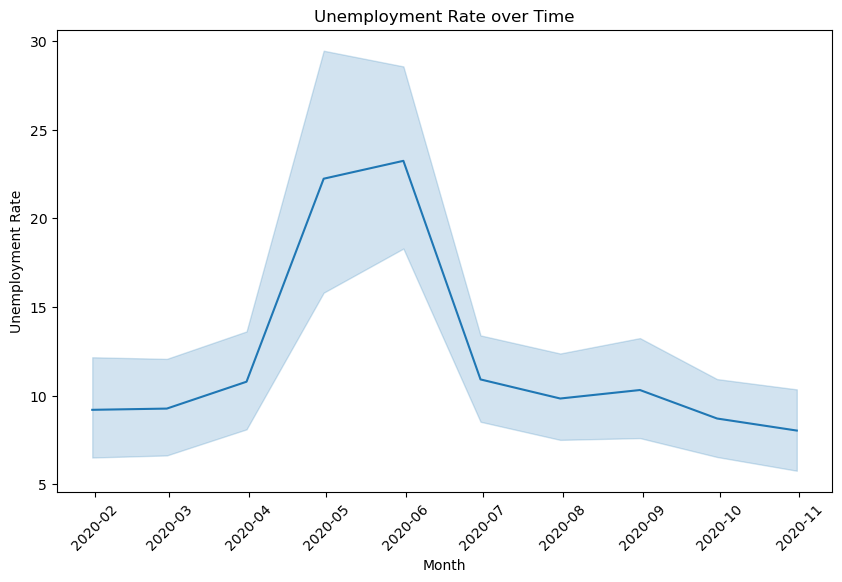

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=ua)
plt.title('Unemployment Rate over Time')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

# Unemployment Rate by Region

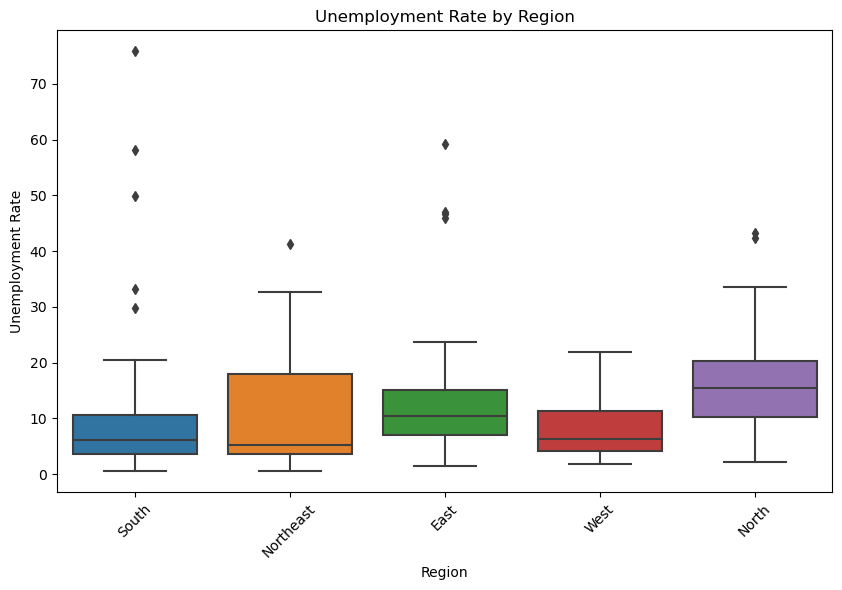

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Unemployment_Rate', data=ua)
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

# Employed vs. Labor Participation Rate

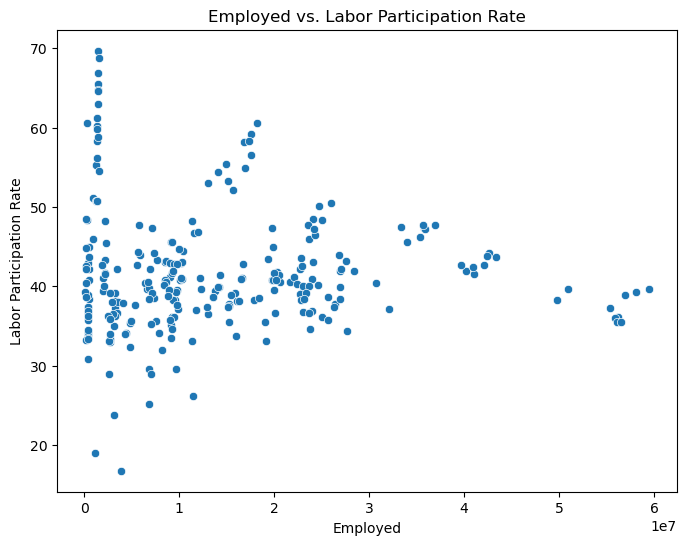

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Employed', y='Labor_Participation_Rate', data=ua)
plt.title('Employed vs. Labor Participation Rate')
plt.xlabel('Employed')
plt.ylabel('Labor Participation Rate')
plt.show()

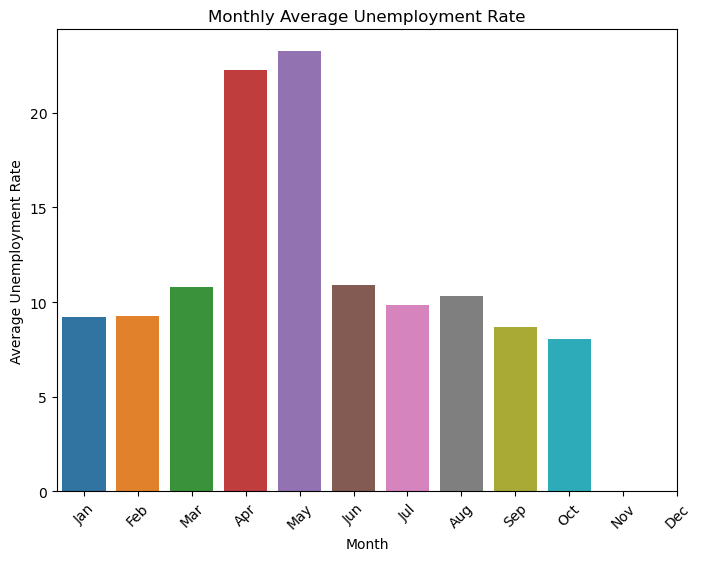

In [43]:
monthly_avg_unemployment = ua.groupby('Month')['Unemployment_Rate'].mean()
# Plotting the monthly average of Unemployment Rate
plt.figure(figsize=(8, 6))
sns.barplot(x=monthly_avg_unemployment.index, y=monthly_avg_unemployment.values)
plt.title('Monthly Average Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate')
plt.xticks(np.arange(0, 12), calendar.month_abbr[1:13], rotation=45)
plt.show()

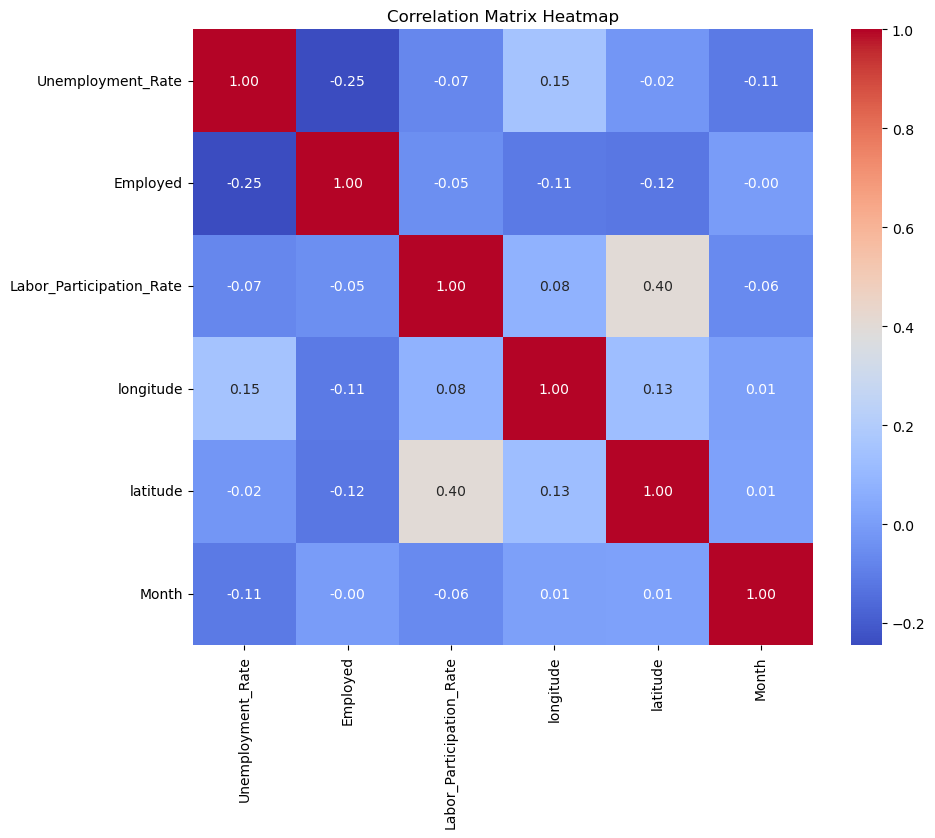

In [44]:
numeric_columns = ua.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

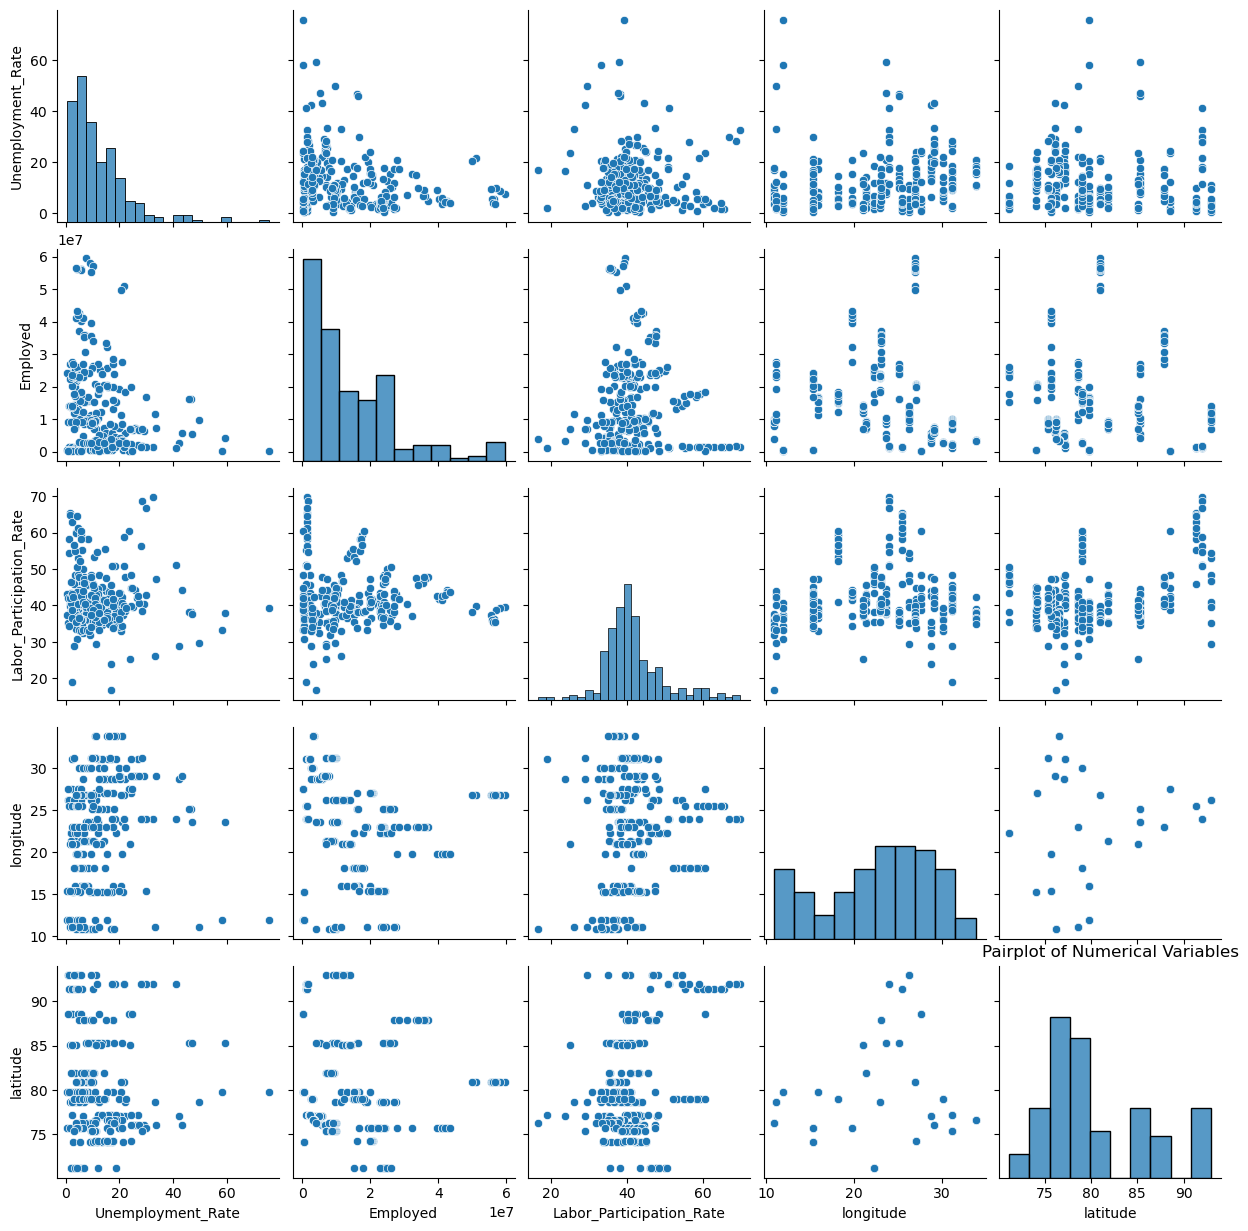

In [45]:
numerical_columns = ['Unemployment_Rate', 'Employed', 'Labor_Participation_Rate', 'longitude', 'latitude']
sns.pairplot(ua[numerical_columns])
plt.title('Pairplot of Numerical Variables')
plt.show()

# IMPACT OF LOCKDOWN ON EMPLOYMENT IN INDIA

In [46]:
fig = px.scatter_geo(ua, 
                     lat='longitude', lon='latitude', color="State",
                     hover_name="State", size="Unemployment_Rate",
                     animation_frame="Month", scope='asia',
                     title='Impact of Lockdown on Employment in India',
                     projection='natural earth',
                     color_continuous_scale='viridis',
                     size_max=30)
fig.update_geos(
    showcoastlines=True, coastlinecolor="RebeccaPurple", coastlinewidth=1,
    showland=True, landcolor="LightGreen", 
    showocean=True, oceancolor="LightBlue", 
    showcountries=True, countrycolor="Black", countrywidth=1, 
    showlakes=True, lakecolor="LightBlue"
)


In [47]:

# Setting center around India and increase the scale for closer view
fig.update_geos(center=dict(lon=78, lat=23), projection_scale=4)

fig.show()


# UNEMPLOYMENT RATE BY STATE

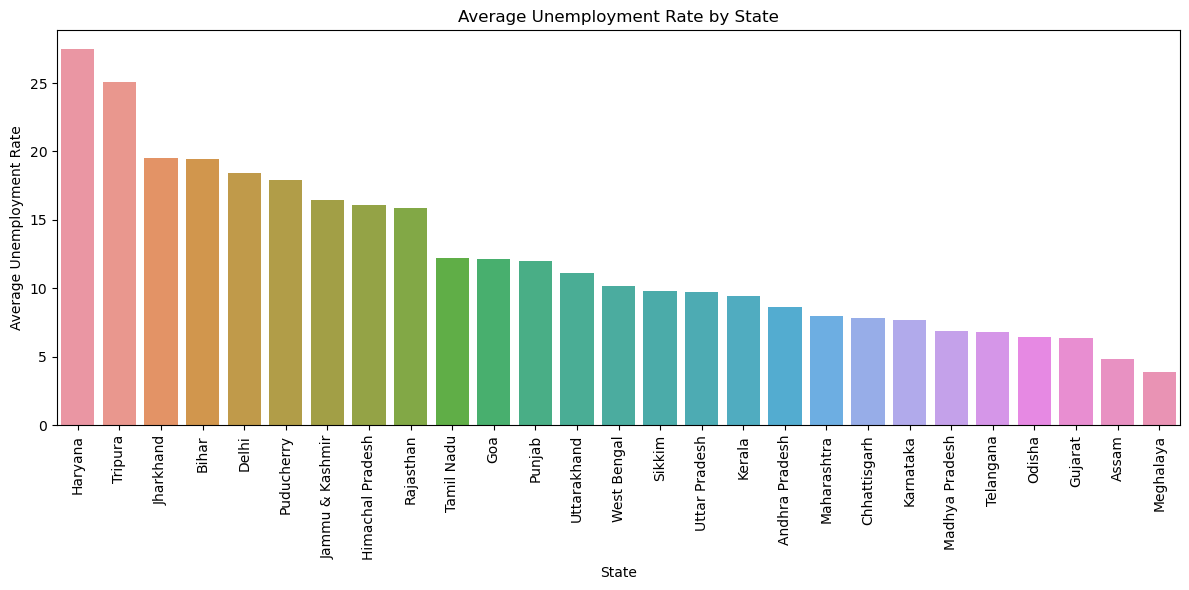

In [48]:
state_unemployment = ua.groupby('State')['Unemployment_Rate'].mean().reset_index()

# Sort the data in descending order to find the state with the highest unemployment rate
state_unemployment_sorted = state_unemployment.sort_values(by='Unemployment_Rate', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Unemployment_Rate', data=state_unemployment_sorted)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by State')
plt.tight_layout()
plt.show()

# Thank You ¯_(ツ)_/¯